#Bibliotecas


In [ ]:
#Bibliotecas Aqui!
import numpy as np
import matplotlib.pyplot as pyplot
import math
from termcolor import colored, cprint 


# Métodos

In [ ]:
#Métodos Aqui!

In [ ]:
#**************************************ELIMINAÇÃO DE GAUSS*******************************************


def forwardElimination(numRC, matrix, results):
  multiplicativeFactor = 0

  for k in range(numRC-1):
    for i in range(k+1, numRC):
      if (matrix[i][k] == 0):
        continue
      
      #printInfos(numRC, matrix, results)

      multiplicativeFactor = matrix[i][k] / matrix[k][k]
      

      for j in range(k, numRC):
        matrix[i][j] = matrix[i][j] - multiplicativeFactor * matrix[k][j]
                 
      results[i] = results[i] - multiplicativeFactor * results[k]

      #printInfos(numRC, matrix, results)

  return matrix, results


def backwardSubstitution(numRC, matrix, results):
  solutionsX = [0 for i in range(numRC)]
  sumMatrix = 0

  for i in range(numRC-1, -1, -1):
    sumMatrix = 0

    for j in range(i+1, numRC):
      sumMatrix += matrix[i][j] * solutionsX[j];

    solutionsX[i] = (results[i] - sumMatrix) / matrix[i][i];
    
  return solutionsX;




def gaussianElimination(numRC, matrix, results):
  printInfos(numRC, matrix, results)

  (matrix, results) = forwardElimination(numRC, matrix, results)
  printInfos(numRC, matrix, results)

  return backwardSubstitution(numRC, matrix, results)




def linearSystemToFunction(matrix, results):
  y1 = lambda x : (results[0] - matrix[0][0]*x)/matrix[0][1]
  y2 = lambda x : (results[1] - matrix[1][0]*x)/matrix[1][1]

  return y1, y2




def graphicalPlot(f1, f2, start, stop, numPoints):
  curve1 = np.linspace(start, stop, numPoints)
  values1 = []

  curve2 = np.linspace(start, stop, numPoints)
  values2 = []


  for value in curve1:
    f1Value = f1(value)
    values1.append(f1Value)

  for value in curve2:
    f2Value = f2(value)
    values2.append(f2Value)

    if(round(f2Value, 4) == round(f1(value), 4)):
      intersectionY = f2Value
      intersectionX = value

  pyplot.plot(curve1, values1, linestyle="-")
  pyplot.plot(curve2, values2, linestyle="-")

  pyplot.plot(intersectionX, intersectionY, linestyle='none', marker='.', color = 'black')  
  pyplot.text(intersectionX, intersectionY, "(%.2f, %.2f)"%(intersectionX, intersectionY), color='black')

  pyplot.title("Representação geométrica do SELA", color='yellow', fontweight='bold')
  pyplot.grid(True)
  pyplot.tick_params(axis='x', colors='yellow')
  pyplot.tick_params(axis='y', colors='yellow')
  pyplot.xlabel('x', color='green', fontweight='bold')
  pyplot.ylabel('f(x)', color='green', fontweight='bold')
  pyplot.show()





def applyMantissa(num, mantissa):
  numMantissa = float(str(num)[:mantissa])

  #aplicar arredondamento simetrico
  if (len(str(num)) > len(str(numMantissa))):
    lenInt = str(numMantissa).find('.')
    if (str(numMantissa).find('-') != -1):          #se houverem numeros negativos, diminui-o do tamanho do inteiro
      lenInt -= 1

    if (lenInt != -1):
      numMantissa = round(num, mantissa - lenInt)

  return numMantissa




def forwardEliminationWithMantissa(numRC, matrix, results, mantissa):
  multiplicativeFactors = []
  multiplicativeFactor = 0

  for k in range(numRC-1):
    for i in range(k+1, numRC):
      if (matrix[i][k] == 0):
        continue
      
      #printInfos(numRC, matrix, results)

      multiplicativeFactor = applyMantissa(matrix[i][k] / matrix[k][k], mantissa)
      multiplicativeFactors.append(multiplicativeFactor)
      

      for j in range(k, numRC):
        matrix[i][j] =  applyMantissa(matrix[i][j] -  applyMantissa(multiplicativeFactor * matrix[k][j], mantissa), mantissa) 
                 
      results[i] = applyMantissa(results[i] - applyMantissa(multiplicativeFactor * results[k], mantissa), mantissa)

      #printInfos(numRC, matrix, results)

  return matrix, results, multiplicativeFactors




def backwardSubstitutionWithMantissa(numRC, matrix, results, mantissa):
  solutionsX = [0 for i in range(numRC)]
  sumMatrix = 0

  for i in range(numRC-1, -1, -1):
    sumMatrix = 0

    for j in range(i+1, numRC):
      sumMatrix += applyMantissa(matrix[i][j] * solutionsX[j], mantissa)

    solutionsX[i] = applyMantissa(applyMantissa((results[i] - sumMatrix), mantissa) / matrix[i][i], mantissa)
    
  return solutionsX;




def gaussianEliminationWithMantissa(numRC, matrix, results, mantissa):
  printInfos(numRC, matrix, results)

  (matrix, results, multiplicativeFactors) = forwardEliminationWithMantissa(numRC, matrix, results, mantissa)
  printInfos(numRC, matrix, results)

  return backwardSubstitutionWithMantissa(numRC, matrix, results, mantissa)




#**************************************FATORAÇÃO LU*******************************************





def generateLower(numRC, matrix, multiplicativeFactors, mantissa):

  multIndex = 0

  for i in range(numRC):
    for j in range(numRC):
      if(i == j):
        matrix[i][j] = 1
      elif (i < j):
        matrix[i][j] = 0
      else:
        matrix[i][j] = multiplicativeFactors[multIndex]
        multIndex += 1

  return matrix




def forwardSubstitution(numRC, matrix, results, mantissa):
  solutionsX = [0 for i in range(numRC)]
  sumMatrix = 0

  for i in range(numRC):
    sumMatrix = 0

    for j in range(i+1):
      sumMatrix += matrix[i][j] * solutionsX[j]

    solutionsX[i] = (results[i] - sumMatrix) / matrix[i][i]
    
  return solutionsX;




def LUFactorization(numRC, matrix, results, mantissa):
  originalMatrix = [[] for i in range(numRC)]

  #Partial pivoting implementation
  max = matrix[0][0]
  maxIndex = 0

  for row in range(1, numRC):
    if(math.fabs(matrix[row][0]) > math.fabs(max)):
      max = matrix[row][0]
      maxIndex = row

  if (maxIndex != 0):
    aux = results[0]
    results[0] = results[maxIndex]
    results[maxIndex] = aux

    for column in range(numRC):
      aux = matrix[0][column]
      matrix[0][column] = matrix[maxIndex][column]
      matrix[maxIndex][column] = aux


  pivot = matrix[0][0]  

  b = results.copy()
  
  for i in range(numRC):
    for j in range(numRC):
      originalMatrix[i].append(matrix[i][j])



  (upper, feResults, multiplicativeFactors) = forwardEliminationWithMantissa(numRC, matrix, results, mantissa)

  lower = generateLower(numRC, originalMatrix, multiplicativeFactors, mantissa)

  printInfos(numRC, upper, b)
  printInfos(numRC, lower, b)

  y = forwardSubstitution(numRC, lower, b, mantissa)
  #printResults(numRC, lower, b, y)
  x = backwardSubstitutionWithMantissa(numRC, upper, y, mantissa)

  printResults(numRC, upper, y, x)

  return x




#**************************************GAUSS-SIEDEL*******************************************


def checkConvergenceDiagonalDominant(numRC, matrix):
  for i in range(numRC):
    sumNonDiagonalElements = 0
    diagonalElement = math.fabs(matrix[i][i])

    for j in range(numRC): 
      if (i != j):
        sumNonDiagonalElements += math.fabs(matrix[i][j])
    
    if ( not (math.fabs(sumNonDiagonalElements) < math.fabs(diagonalElement)) ):
      return False

  return True


def gaussSeidel(numRC, matrix, results, iterations):
  
    if (checkConvergenceDiagonalDominant(numRC, matrix)):
      x = [0 for i in range(numRC)]
      newX = 0

      for k in range(iterations):
        currentXIndex = 0
        for i in range(numRC):
          newX = results[i]
          for j in range(numRC):
            if (i != j):
              newX -= matrix[i][j]*x[j]
        
          newX /= matrix[i][i]
          x[i] = newX

        printItem("\nITERATION " + str (k) + "\n\n")
        printResults(numRC, matrix, results, x) 

    else:
      printError("\n\n\t********************MATRIZ DE ENTRADA NÃO CONVERGE! NÃO É DIAGONALMENTE DOMINANTE!***************************\n\n")


#**************************************SAÍDA DE DADOS*******************************************


def printResults(numRC, matrix, results, solutions):
  printTitle("\t\t\t****************FINAL MATRIX*********************\n")

  for i in range(numRC):
    for j in range(numRC):
      printColoredResultsNoNewLine("\t%12.5fx%i" % (matrix[i][j], j+1))

    printColoredResultsNoNewLine(" | %12.5f" % (results[i]))
    printColoredResults(" -> x%i=%25.5f\n" % (i+1, solutions[i]))




def printResultsPrecision2(numRC, matrix, results, solutions):
  printTitle("\t\t\t****************FINAL MATRIX*********************\n")

  for i in range(numRC):
    for j in range(numRC):
      printColoredResultsNoNewLine("\t%12.2fx%i" % (matrix[i][j], j+1))

    printColoredResultsNoNewLine(" | %12.2f" % (results[i]))
    printColoredResults(" -> x%i=%12.2f\n" % (i+1, solutions[i]))




def printInfos(numRC, matrix, results):
  printTitle("\t\t\t****************MATRIX*********************\n")

  for i in range(numRC):
    for j in range(numRC):
      printColoredResultsNoNewLine("\t%12.5fx%i" % (matrix[i][j], j+1))

    printColoredResults(" | %12.5f" % (results[i]))

  print("\n\n");




def printApproximatedInfos(approximatedResults, realResults):
  printTitle("\t\t\t****************(APPROXIMATED x REAL) RESULTS*********************\n")

  for i in range(len(approximatedResults)):
    printColoredResults("\tx%i: %12.5f | %12.5f" % (i+1, approximatedResults[i], realResults[i]))
    
  print("\n\n");




def printTitle(title):
  print(colored(title, 'yellow', attrs=['bold'])) 




def printColoredResults(resultStr):
  print(colored(resultStr, 'green'))




def printColoredResultsNoNewLine(resultStr):
  print(colored(resultStr, 'green'), end = '')



def printItem(item):
  print(colored(item + "\n\n", 'cyan', attrs=['bold']))




def printError(error):
  print(colored(error + "\n\n", 'red', attrs=['bold']))    



# Lista de Exercício 3


##Questão 1 – Considere a resolução direta de SELAs.
1.   Resolva pelo método de Eliminação de Gauss (∗)
 
> x1+2x2 =10

> 1,1x1 + 2x2 = 10,4

2.   Resolva pelo método de Eliminação de Gauss o sistema perturbado (⋆)

> x1+2x2 =10

> 1,1x1 + 2x2 = 10,8

3.  Compare a nova solução encontrada para o SELA (⋆) com a solução do SELA (∗). 
4.  Faça a representação geométrica das equações do SELA (∗).

*****************************************ITEM 1*****************************************************


			****************MATRIX*********************

	     1.00000x1	     2.00000x2 |     10.00000
	     1.10000x1	     2.00000x2 |     10.40000



			****************MATRIX*********************

	     1.00000x1	     2.00000x2 |     10.00000
	     0.00000x1	    -0.20000x2 |     -0.60000



			****************FINAL MATRIX*********************

	     1.00000x1	     2.00000x2 |     10.00000 -> x1=                  4.00000

	     0.00000x1	    -0.20000x2 |     -0.60000 -> x2=                  3.00000

*****************************************ITEM 2*****************************************************


			****************MATRIX*********************

	     1.00000x1	     2.00000x2 |     10.00000
	     1.10000x1	     2.00000x2 |     10.80000



			****************MATRIX*********************

	     1.00000x1	     2.00000x2 |     10.00000
	     0.00000x1	    -0.20000x2 |     -0.20000



			*******

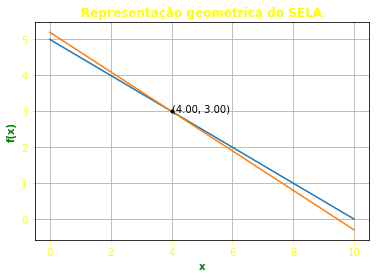

In [ ]:
#1.
printItem("*****************************************ITEM 1*****************************************************")

matrix1 = [[1, 2], [1.1, 2]]
results1 = [10, 10.4]
numRC1 = len(matrix1)

solutionsX1 = gaussianElimination(numRC1, matrix1, results1)
printResults(numRC1, matrix1, results1, solutionsX1)

#2.
printItem("*****************************************ITEM 2*****************************************************")

matrix2 = [[1, 2], [1.1, 2]]
results2 = [10, 10.8]
numRC2 = len(matrix2)

solutionsX2 = gaussianElimination(numRC2, matrix2, results2)
printResults(numRC2, matrix2, results2, solutionsX2)

#3.


#4.
printItem("*****************************************ITEM 4*****************************************************")

matrix1 = [[1, 2], [1.1, 2]]
results1 = [10, 10.4]
numRC1 = len(matrix1)

(y1, y2) = linearSystemToFunction(matrix1, results1)
graphicalPlot(y1, y2, 0, 10, 10000)


#1.3

Comparando os dois SELAs encontrados, percebemos que são resolvidos corretamente pela aplicação do método da eliminação de Gauss, entregando seus valores esperados. Também é interessante notarmos que, para uma pequena mudança no resultado da segunda equação de apenas 0,4 (o valor foi mudado de 10,8 para 10,4), o x1 e o x2 mudam muito mais, com x1 indo de 4 para 8 e x2 de 3 para 1. Esse comportamento pode ser deduzido pelo gráfico apresentado na 1.4, que demonstra retas quase paralelas para cada equação, as quais apresentam, assim, uma intersseção própria de problemas mal postos, como lecionado na aula 08 de Cálculo Numérico da UNIVESP pela professora Joyce Bevilacqua(https://www.youtube.com/watch?v=xU3yJiCw6GI&list=PLxI8Can9yAHdytibfatcKa1MQk6k3JAjz&index=9).  

##Questão 2 – Seja o sistema

> 8,7x1 +3,0x2 +9,3x3 +11,0x4 = 16,4

> 24,5x1 −8,8x2 +11,5x3 −45,1x4 = −49,7

> 52,3x1 −84,0x2 −23,5x3 +11,4x4 = −80,8

> 21,0x1 −81,0x2 −13,2x3 +21,5x4 = −106,3


1. Mostre que o SELA tem solução aproximada x1 = 0,97; x2 = 1,98; x3= −0,97; x4 = 1,00.
2. Refina esta solução, retendo durante os cálculos duas casas decimais.

In [ ]:
printItem("\n\t*****************************************CÁLCULO INICIAL*****************************************************\n\n")

matrix = [[8.7, 3, 9.3, 11], 
           [24.5, -8.8, 11.5, -45.1],
           [52.3, -84, -23.5, 11.4],
           [21, -81, -13.2, 21.5]]

results = [16.4, -49.7, -80.8, -106.3]
numRC = len(matrix)

solutionsX = gaussianElimination(numRC, matrix, results)
printResults(numRC, matrix, results, solutionsX)

#1.
printItem("\n\t*****************************************ITEM 1*****************************************************\n\n")

x0 = [0.97, 1.98, -0.97, 1.00]

matrix = [[8.7, 3, 9.3, 11], 
           [24.5, -8.8, 11.5, -45.1],
           [52.3, -84, -23.5, 11.4],
           [21, -81, -13.2, 21.5]]

approximatedResults = []

for i in range(len(matrix)):
  rowSum = 0

  for j in range(len(matrix[i])):
    rowSum += matrix[i][j]*x0[j]    

  approximatedResults.append(rowSum)

results = [16.4, -49.7, -80.8, -106.3]

printApproximatedInfos(approximatedResults, results)


#2.
printItem("\n\t*****************************************ITEM 2*****************************************************\n\n")

mantissa = 4
matrix = [[8.7, 3, 9.3, 11], 
           [24.5, -8.8, 11.5, -45.1],
           [52.3, -84, -23.5, 11.4],
           [21, -81, -13.2, 21.5]]

results = [16.4, -49.7, -80.8, -106.3]
numRC = len(matrix)

solutionsX = gaussianEliminationWithMantissa(numRC, matrix, results, mantissa)
printResultsPrecision2(numRC, matrix, results, solutionsX)





	*****************************************CÁLCULO INICIAL*****************************************************




			****************MATRIX*********************

	     8.70000x1	     3.00000x2	     9.30000x3	    11.00000x4 |     16.40000
	    24.50000x1	    -8.80000x2	    11.50000x3	   -45.10000x4 |    -49.70000
	    52.30000x1	   -84.00000x2	   -23.50000x3	    11.40000x4 |    -80.80000
	    21.00000x1	   -81.00000x2	   -13.20000x3	    21.50000x4 |   -106.30000



			****************MATRIX*********************

	     8.70000x1	     3.00000x2	     9.30000x3	    11.00000x4 |     16.40000
	     0.00000x1	   -17.24828x2	   -14.68966x3	   -76.07701x4 |    -95.88391
	     0.00000x1	     0.00000x2	     7.49172x3	   395.31730x4 |    387.82558
	     0.00000x1	     0.00000x2	     0.00000x3	 -1700.32498x4 |  -1700.32498



			****************FINAL MATRIX*********************

	     8.70000x1	     3.00000x2	     9.30000x3	    11.00000x4 |     16.40000 -> x1=                  1.00000

	     0.000

##Questão 3 – Resolva o sistema por Fatoração LU usando Doolittle (com pivotamento parcial) o SELA representado pela expressão matricial aplicando F (10, 3, e1, e2):

> 2x1 +  x2 + 2x3 = 1

>  x1 + 2x2 + 3x3 = 0 

> 4x1 +  x2 + 2x3 = 3   

In [ ]:
mantissa = 10
matrix = [[2, 1, 2], 
           [1, 2, 3],
           [4, 1, 2]]

results = [1, 0, 3]
numRC = 3

x = LUFactorization(3, matrix, results, mantissa)

			****************MATRIX*********************

	     4.00000x1	     1.00000x2	     2.00000x3 |      3.00000
	     0.00000x1	     1.75000x2	     2.50000x3 |      0.00000
	     0.00000x1	     0.00000x2	     0.28571x3 |      1.00000



			****************MATRIX*********************

	     1.00000x1	     0.00000x2	     0.00000x3 |      3.00000
	     0.25000x1	     1.00000x2	     0.00000x3 |      0.00000
	     0.50000x1	     0.28571x2	     1.00000x3 |      1.00000



			****************FINAL MATRIX*********************

	     4.00000x1	     1.00000x2	     2.00000x3 |      3.00000 -> x1=                  1.00000

	     0.00000x1	     1.75000x2	     2.50000x3 |     -0.75000 -> x2=                  1.00000

	     0.00000x1	     0.00000x2	     0.28571x3 |     -0.28571 -> x3=                 -1.00000



##Questão 4 – (Valor: 3.0 pts) – Dados os SELAs:
(S1)   
> 11x1+13x2 =286

> 11x1-9x2 =99

(S2)   
> 11x1 -9x2 =99

> 11x1 +13x2 =286

1. Mostre que na resolução do sistema pelo método de iterativo de Gauss-Seidel a convergência depende da ordem das equações.
2. Identifique qual dos sistemas está representado nos gráficos (a) e (b) abaixo, partindo da origem (0, 0). Justifique porque isso ocorre.

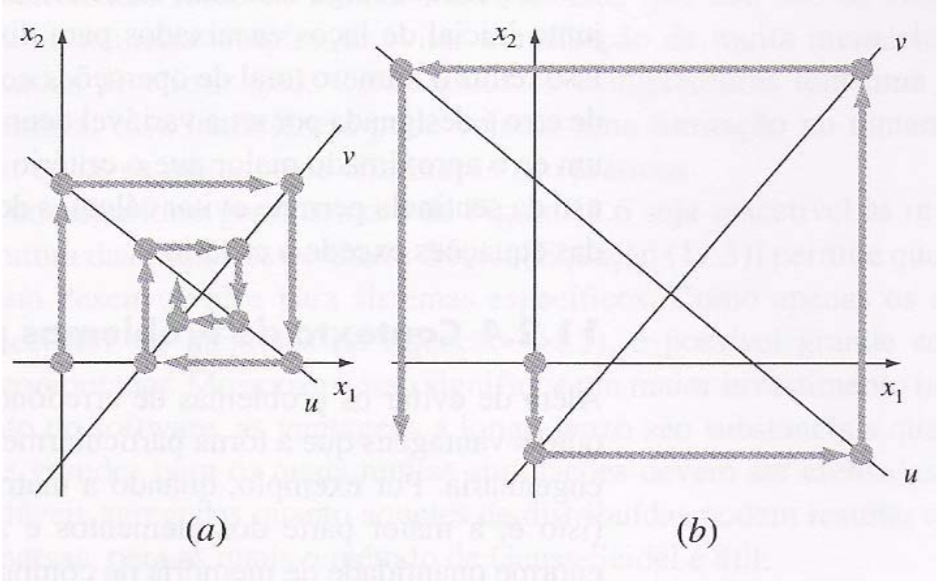



In [ ]:
#1.
printItem("\n\t*****************************************SELA S1*****************************************************\n\n")

iterations = 50

S1 = [[11, 13], [11, -9]]
results1 = [286, 99]
numRC1 = len(S1)

gaussSeidel(numRC1, S1, results1, iterations)
#printResults(numRC1, matrix1, results1, solutionsX1)

printItem("\n\t*****************************************SELA S2*****************************************************\n\n")

S2 = [[11, -9], [11, 13]]
results2 = [99, 286]
numRC2 = len(S2)

gaussSeidel(numRC2, S2, results2, iterations)
#printResults(numRC2, matrix2, results2, solutionsX2)


#S2 = [[11, -9], [11, 13]]
#results2 = [99, 286]
#numRC2 = len(S2)

#LUFactorization(numRC2, S2, results2, 10)



	*****************************************SELA S1*****************************************************






	********************MATRIZ DE ENTRADA NÃO CONVERGE! NÃO É DIAGONALMENTE DOMINANTE!***************************





	*****************************************SELA S2*****************************************************





ITERATION 0




			****************FINAL MATRIX*********************

	    11.00000x1	    -9.00000x2 |     99.00000 -> x1=                  9.00000

	    11.00000x1	    13.00000x2 |    286.00000 -> x2=                 14.38462


ITERATION 1




			****************FINAL MATRIX*********************

	    11.00000x1	    -9.00000x2 |     99.00000 -> x1=                 20.76923

	    11.00000x1	    13.00000x2 |    286.00000 -> x2=                  4.42604


ITERATION 2




			****************FINAL MATRIX*********************

	    11.00000x1	    -9.00000x2 |     99.00000 -> x1=                 12.62130

	    11.00000x1	    13.00000x2 |    286.00000 -> x2=       

#4.2
A figura (a) refere-se ao sistema S2, pois este é diagonalmente dominante logo, converge, como é demonstrado na figura (a) onde as 
soluções encontradas tendem a convergir em um ponto único, central, assim como demonstrou a própria execução de S2, onde foi possível perceber x1 com valores em torno de 15.95455 para x1 e em torno de 8.5 para x2, valores esses os quais são orbitados iteração após iteração passadas em torno de 40 iterações tornando, assim, a solução de S2 convergente ao resultado esperado.

Já a figura (b) representa o S1,visto que, como não é diagonalmente dominante, sua resposta irá divergir ao aplicar o método Gauss Seidel,
assim como foi implementado em seu método. A figura (b), por sua vez, demonstra soluções se movendo a pontos cada vez mais distantes da solução, ou seja, divergentes de soluções.

Isso demonstra que, para um mesmo sistema, se suas linhas estiverem organizadas de forma diferente, podemos ou não encontrar solução pelo método iterativo de Gauss-Seidel, ou seja, sempre que quisermos resolver sistemas de equações lineares por este método, devemos atentar-nos a organização das linhas do SELA, realizando as trocas necessárias para que este , possivelmente, seja transformado em diagonalmente dominante e, por fim, obtenha solução pelo método de Gauss-Seidel.